# Decision Tree Classification with Python and Scikit-Learn


In this project, I build a Decision Tree Classifier to predict the safety of the car. I build two models, one with criterion `gini index` and another one with criterion `entropy`. I implement Decision Tree Classification with Python and Scikit-Learn. I have used the **Car Evaluation Data Set** for this project, downloaded from the UCI Machine Learning Repository website.

## Table of Contents


1.	Introduction to Decision Tree algorithm
2.	Classification and Regression Trees
3.	Decision Tree algorithm intuition
4.	Attribute selection measures
    - Information gain
    - Gini index
5.	The problem statement
6.	Dataset description
7.	Import libraries
8.	Import dataset
9.	Exploratory data analysis
10.	Declare feature vector and target variable
11.	Split data into separate training and test set
12.	Feature engineering
13.	Decision Tree classifier with criterion gini-index
14.	Decision Tree classifier with criterion entropy
15.	Confusion matrix
16.	Classification report
17.	Results and conclusion


## 1. Introduction to Decision Tree algorithm


A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes. 


A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node. 


## 2. Classification and Regression Trees (CART)


Nowadays, Decision Tree algorithm is known by its modern name **CART** which stands for **Classification and Regression Trees**.
Classification and Regression Trees or **CART** is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification and regression modeling problems.The CART algorithm provides a foundation for other important algorithms like bagged decision trees, random forest and boosted decision trees.


In this project, I will solve a classification problem. So, I will refer the algorithm also as Decision Tree Classification problem. 


## 3. Decision Tree algorithm intuition

The Decision-Tree algorithm is one of the most frequently and widely used supervised machine learning algorithms that can be used for both classification and regression tasks. The intuition behind the Decision-Tree algorithm is very simple to understand.


The Decision Tree algorithm intuition is as follows:-


1.	For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node. 

2.	For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

3.	This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.


## 4. Attribute selection measures


The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node and each level. This process is known as the **attributes selection**. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.


There are 2 popular attribute selection measures. They are as follows:-


- **Information gain**

- **Gini index**


While using **Information gain** as a criterion, we assume attributes to be categorical and for **Gini index** attributes are assumed to be continuous. These attribute selection measures are described below.


### Information gain


By using information gain as a criterion, we try to estimate the information contained by each attribute. To understand the concept of Information Gain, we need to know another concept called **Entropy**. 


Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. **Information gain** is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. 


The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain. So, by calculating decrease in **entropy measure** of each attribute we can calculate their information gain. The attribute with the highest information gain is chosen as the splitting attribute at the node.


### Gini index


Another attribute selection measure that **CART (Categorical and Regression Trees)** uses is the **Gini index**. It uses the Gini method to create split points. 

Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.

It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

Steps to Calculate Gini for a split

1.	Calculate Gini for sub-nodes, using formula sum of the square of probability for success and failure (p^2+q^2).

2.	Calculate Gini for split using weighted Gini score of each node of that split.


In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point. The attribute with minimum Gini index is chosen as the splitting attribute.


## 5. The problem statement


The problem is to predict the safety of the car. In this project, I build a Decision Tree Classifier to predict the safety of the car. I implement Decision Tree Classification with Python and Scikit-Learn. I have used the **Car Evaluation Data Set** for this project, downloaded from the UCI Machine Learning Repository website.


## 6. Dataset description


I have used the **Car Evaluation Data Set** downloaded from the Kaggle website. I have downloaded this data set from the Kaggle website. The data set can be found at the following url:-


http://archive.ics.uci.edu/ml/datasets/Car+Evaluation


Car Evaluation Database was derived from a simple hierarchical decision model originally developed for expert system for decision making. The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety. 

It was donated by Marko Bohanec.

## 7. Import libraries

In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [413]:
import warnings

warnings.filterwarnings('ignore')

## 8. Import dataset

In [414]:
#melihat isi dataset
df = pd.read_excel("/content/EmployedataSet.xlsx")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,Leave
1,Bachelors,2013,Pune,1,28,Female,No,3,Not
2,Bachelors,2014,New Delhi,3,38,Female,No,2,Leave
3,Masters,2016,Bangalore,3,27,Male,No,5,Not
4,Masters,2017,Pune,3,24,Male,Yes,2,Not
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,Leave
4649,Masters,2013,Pune,2,37,Male,No,2,Not
4650,Masters,2018,New Delhi,3,27,Male,No,5,Not
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,Leave


## 9. Exploratory data analysis


Now, I will explore the data to gain insights about the data. 

In [415]:
# view dimensions of dataset

df.shape

(4653, 9)

We can see that there are 1728 instances and 7 variables in the data set.

### View top 5 rows of dataset

In [416]:
# preview the dataset

df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,Leave
1,Bachelors,2013,Pune,1,28,Female,No,3,Not
2,Bachelors,2014,New Delhi,3,38,Female,No,2,Leave
3,Masters,2016,Bangalore,3,27,Male,No,5,Not
4,Masters,2017,Pune,3,24,Male,Yes,2,Not


We can see that the column names have meaningful names.

### View summary of dataset

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   object
dtypes: int64(4), object(5)
memory usage: 327.3+ KB


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [418]:
col_names = ['Education','JoiningYear','City','PaymentTier','Age','Gender','EverBenched','ExperienceInCurrentDomain','LeaveOrNot']


for col in col_names:
    
    print(df[col].value_counts())   


Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64
2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64
Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64
3    3492
2     918
1     243
Name: PaymentTier, dtype: int64
26    645
28    630
27    625
25    418
24    385
29    230
30    220
37    141
36    139
34    136
38    136
40    134
32    132
39    131
31    125
33    124
35    123
41     82
22     49
23     48
Name: Age, dtype: int64
Male      2778
Female    1875
Name: Gender, dtype: int64
No     4175
Yes     478
Name: EverBenched, dtype: int64
2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64
Leave    3053
Not      1600
Name: LeaveOrNot, dtype: int64


We can see that the `Education`, `LeaveOrNot`, `Gender`, and `EverBanched` are categorical in nature. So, I will treat them as categorical variables.

### Summary of variables


- There are 7 variables in the dataset. All the variables are of categorical data type.

'Education','JoiningYear','City','PaymentTier','Age','Gender','EverBenched','ExperienceInCurrentDomain','LeaveOrNot'


- These are given by `Education`, `JoiningYear`, `City`, `PaymenTier`, `Age`, `Gender`, `EverBenched`, `ExperienceInCurrentDomain`, and `LeaveOrNot`


- `LeaveOrNot` is the target variable.

### Explore `class` variable

In [419]:
df['LeaveOrNot'].value_counts()

Leave    3053
Not      1600
Name: LeaveOrNot, dtype: int64

The `class` target variable is ordinal in nature.

### Missing values in variables

In [420]:
# check missing values in variables

df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

## 12. Feature Engineering


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will check the data types of variables again.

In [421]:
# check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   object
dtypes: int64(4), object(5)
memory usage: 327.3+ KB


Karena isi Dataset secara keseluruhan yang kita punya adalah bukan category, jadi kita melakukan transformasi data menggunakan LabelEncoder, bukan categoty_encoders

In [422]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Education'] = lb.fit_transform(df['Education'].values)
df['JoiningYear'] = lb.fit_transform(df['JoiningYear'].values)
df['City'] = lb.fit_transform(df['City'].values)
df['PaymentTier'] = lb.fit_transform(df['PaymentTier'].values)
df['Age'] = lb.fit_transform(df['Age'].values)
df['Gender'] = lb.fit_transform(df['Gender'])
df['EverBenched'] = lb.fit_transform(df['EverBenched'].values)
df['ExperienceInCurrentDomain'] = lb.fit_transform(df['ExperienceInCurrentDomain'].values)

We now have training and test set ready for model building. 

## 10. Declare feature vector and target variable

In [423]:
X = df.drop(['LeaveOrNot'], axis=1)

y = df['LeaveOrNot']

## 11. Split data into separate training and test set

In [424]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [425]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3117, 8), (1536, 8))

## 13. Decision Tree Classifier with criterion gini index

In [426]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier


In [427]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=0)

### Predict the Test set results with criterion gini index

In [428]:
y_pred_gini = clf_gini.predict(X_test)


### Check accuracy score with criterion gini index

In [429]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8568


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [430]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['Leave', 'Leave', 'Leave', ..., 'Leave', 'Leave', 'Leave'],
      dtype=object)

In [431]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8364


### Check for overfitting and underfitting

In [432]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8364
Test set score: 0.8568


Here, the training-set accuracy score is 0.8364 while the test-set accuracy to be 0.8568. These two values are quite comparable. So, there is no sign of overfitting. 


## 14. Decision Tree Classifier with criterion entropy

In [433]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

### Predict the Test set results with criterion entropy

In [434]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [435]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8568


### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [436]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['Leave', 'Leave', 'Leave', ..., 'Leave', 'Leave', 'Leave'],
      dtype=object)

In [437]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8364


### Check for overfitting and underfitting

In [438]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8364
Test set score: 0.8568


In [439]:
print('Gini Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Gini Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

print('Entrophy Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Entrophy Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Gini Training set score: 0.8364
Gini Test set score: 0.8568
Entrophy Training set score: 0.8364
Entrophy Test set score: 0.8568


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.8364 while the test-set accuracy to be 0.8568. These two values are quite comparable. So, there is no sign of overfitting. 


Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

## 15. Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [440]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[975  29]
 [191 341]]


## 16. Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [441]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

       Leave       0.84      0.97      0.90      1004
         Not       0.92      0.64      0.76       532

    accuracy                           0.86      1536
   macro avg       0.88      0.81      0.83      1536
weighted avg       0.87      0.86      0.85      1536



## 17. Results and conclusion


1.	In this project, I build a Decision-Tree Classifier model to predict the employee will Leave or Not. I build two models, one with criterion `gini index` and another one with criterion `entropy`. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8568.
2.	In the model with criterion `gini index`, the training-set accuracy score is 0.8364 while the test-set accuracy to be 0.8568. These two values are quite comparable. So, there is no sign of overfitting.
3.	Similarly, in the model with criterion `entropy`, the training-set accuracy score is 0.8364 while the test-set accuracy to be 0.8568.We get the same values as in the case with criterion `gini`. So, there is no sign of overfitting.
4.	In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
5.	The confusion matrix and classification report yields very good model performance.
6. The higher the max_depth value, the accuracy rate also increases
7. If the contents of the dataset are in the form of categories, it is better to use category_encoder than to use label_encoder because using category_encoder has higher accuracy

In [442]:
#Exporting Decision Tree to the text representation

from sklearn import tree

text_representation = tree.export_text(clf_gini)
print(text_representation)

|--- feature_1 <= 5.50
|   |--- feature_3 <= 1.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- feature_1 <= 3.50
|   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |--- class: Leave
|   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |--- class: Not
|   |   |   |--- feature_1 >  3.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- class: Leave
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- class: Leave
|   |   |--- feature_2 >  1.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- class: Not
|   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |--- class: Leave
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- feature_4 <= 5.50
|   |   |   |   |   |--- class: Leave
|   |   |   |   |--- feature_4 >  5.50
|   |   |   |   |   |--- class: Leave
|   |--- feature_3 >  1.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- feature_2 <= 1.50
|   

In [443]:
#f you want to save it to the file, it can be done with following code:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)


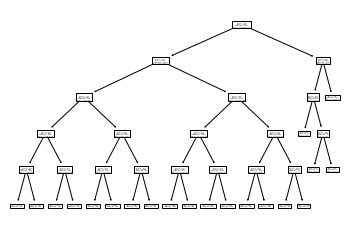

In [444]:
#The code below plots a decision tree using scikit-learn.

from sklearn import tree

tree.plot_tree(clf_gini);

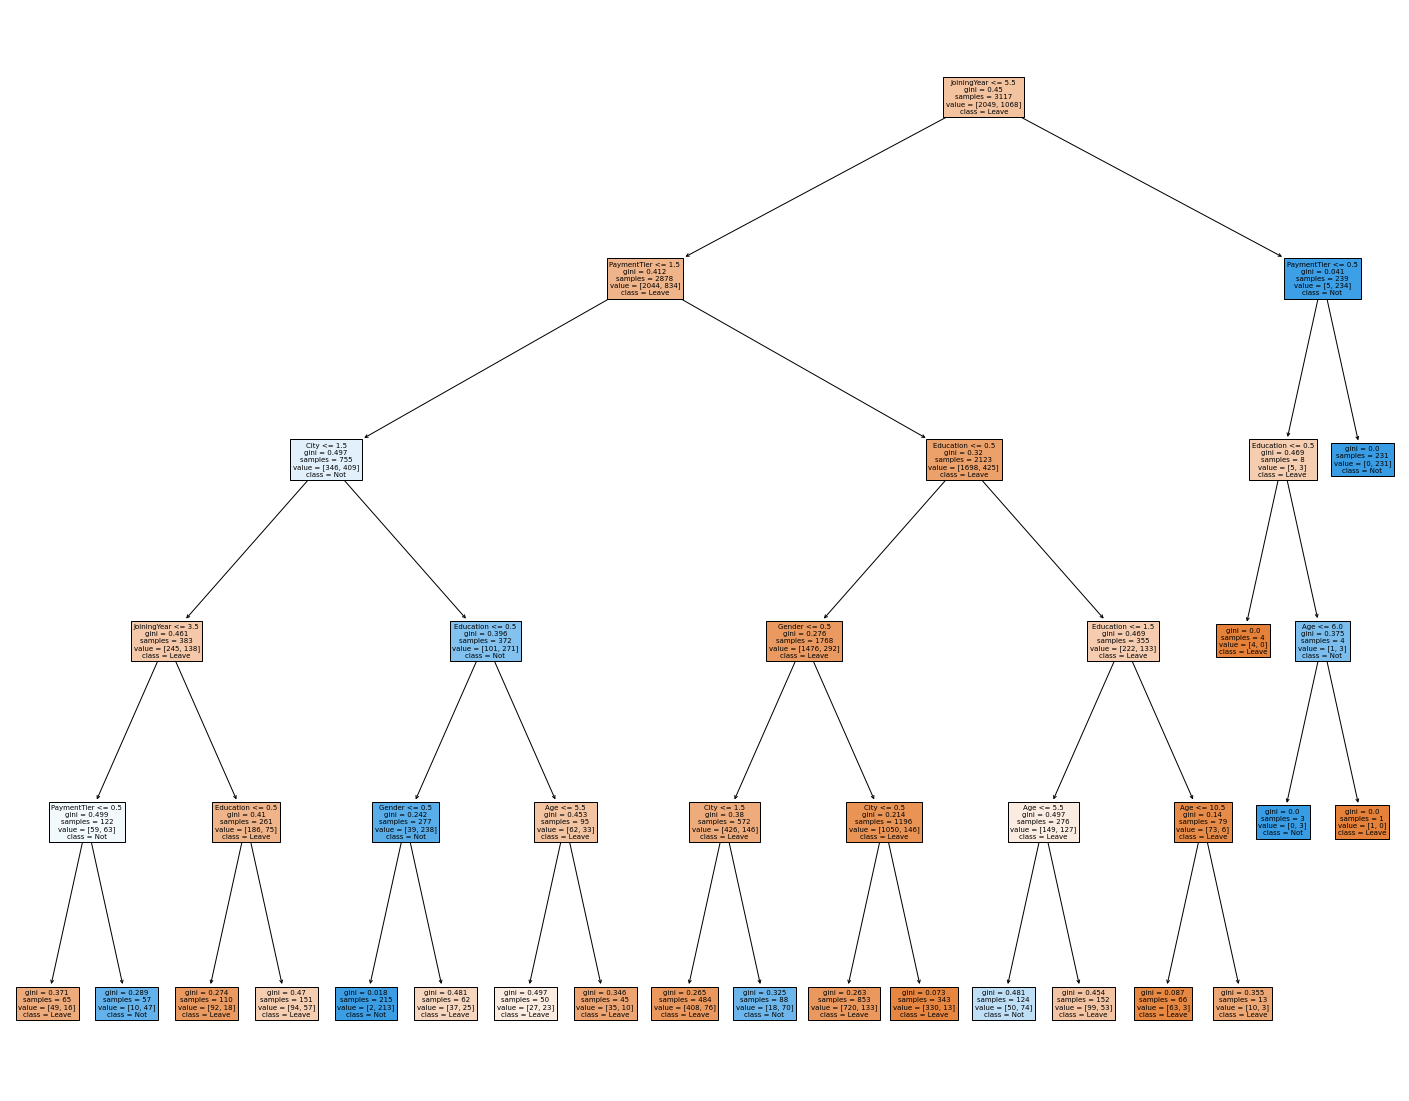

In [445]:
#Advance plot_tree

feature_name = df.columns[:9]
target_names = df['LeaveOrNot'].unique().tolist()


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_gini, 
                   feature_names=feature_name,  
                   class_names=target_names,
                   filled=True)



In [446]:
#Save Figure
fig.savefig("decistion_tree.png")